<a href="https://colab.research.google.com/github/Chhayaonly/food101/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#preprocessing
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder as oh
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
train = pd.read_csv('/content/updated_pollution_dataset (1).csv')
X=train.drop(columns='Air Quality')
y=train['Air Quality']

X_scaled=StandardScaler().fit_transform(X)
y_encoded= oh(sparse_output=False).fit_transform(y.values.reshape(-1,1))
# Original data split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Further split the temporary dataset into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print("No. of training samples = ",y_train.shape[0])
print("No. of test samples = ",X_test.shape[0])
print('no. of validation samples=',X_val.shape[0])

No. of training samples =  3500
No. of test samples =  750
no. of validation samples= 750


In [3]:
#building model
model = keras.models.Sequential()

layr_1 = layers.Dense(9, activation="relu",input_shape=(X_train.shape[1],))
layr_2 = layers.Dense(16, activation="relu", name="layr_2")
layr_3= layers.Dense(8,activation='relu')
layr_4 = layers.Dense(8, activation="relu", name="layr_4")
layr_5 = layers.Dense(4, activation="softmax", name="layr_5")

model.add(layr_1)
model.add(layr_2)
model.add(layr_3)
model.add(layr_4)
model.add(layr_5)



model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=["accuracy"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layr_2 (Dense)                       │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layr_4 (Dense)                       │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layr_5 (Dense)                       │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494 (1.93 KB)

 Trainable params: 494 (1.93 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
n_epochs = 50 # set number of epochs
batch_size = 200

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history= model.fit(X_train,y_train,batch_size=batch_size,epochs=n_epochs,validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3148 - loss: 1.3724 - val_accuracy: 0.5000 - val_loss: 1.3342
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5288 - loss: 1.3125 - val_accuracy: 0.5120 - val_loss: 1.2641
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5384 - loss: 1.2396 - val_accuracy: 0.5413 - val_loss: 1.1681
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5744 - loss: 1.1255 - val_accuracy: 0.5747 - val_loss: 1.0458
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5964 - loss: 1.0017 - val_accuracy: 0.6080 - val_loss: 0.9209
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6537 - loss: 0.8889 - val_accuracy: 0.6933 - val_loss: 0.7992
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7136 - loss: 0.7711 - val_accuracy: 0.7173 - val_loss: 0.6882
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7317 - loss: 0.6885 - val_accuracy: 0.7853 - val_loss

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9215 - loss: 0.2000 
Loss =  0.18473459780216217
Accuracy =  93.06666851043701 %
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


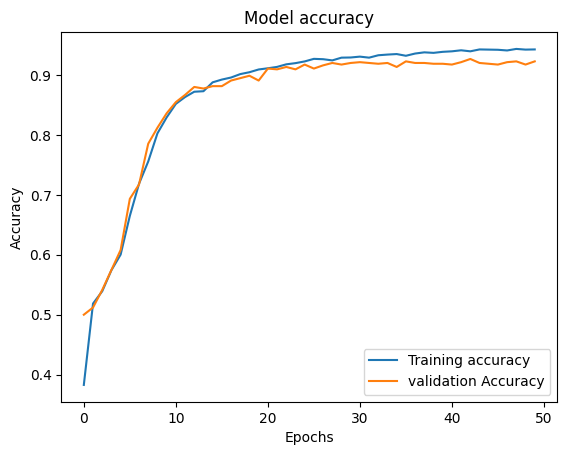

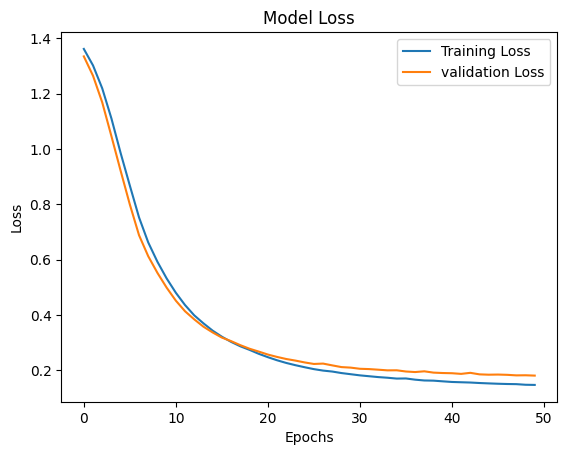

In [5]:
results = model.evaluate(X_test, y_test)

print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")
print(history.history.keys())
# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# plot loss...
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
